In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Charger les deux fichiers CSV
df1 = pd.read_csv('data/restaurant_1_week_007.csv')
df2 = pd.read_csv('data/restaurant_1_week_002.csv')

# Combiner les deux DataFrames
combined_df = pd.concat([df1, df2], ignore_index=True)

# Convertir les dates en datetime et calculer le chiffre d'affaires
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'])
combined_df['Revenue'] = combined_df['Quantity'] * combined_df['Product Price']

# Agréger les données par semaine
weekly_revenue = combined_df.groupby(pd.Grouper(key='Order Date', freq='W'))['Revenue'].sum().reset_index()

16:20:01 - cmdstanpy - INFO - Chain [1] start processing
16:20:02 - cmdstanpy - INFO - Chain [1] done processing


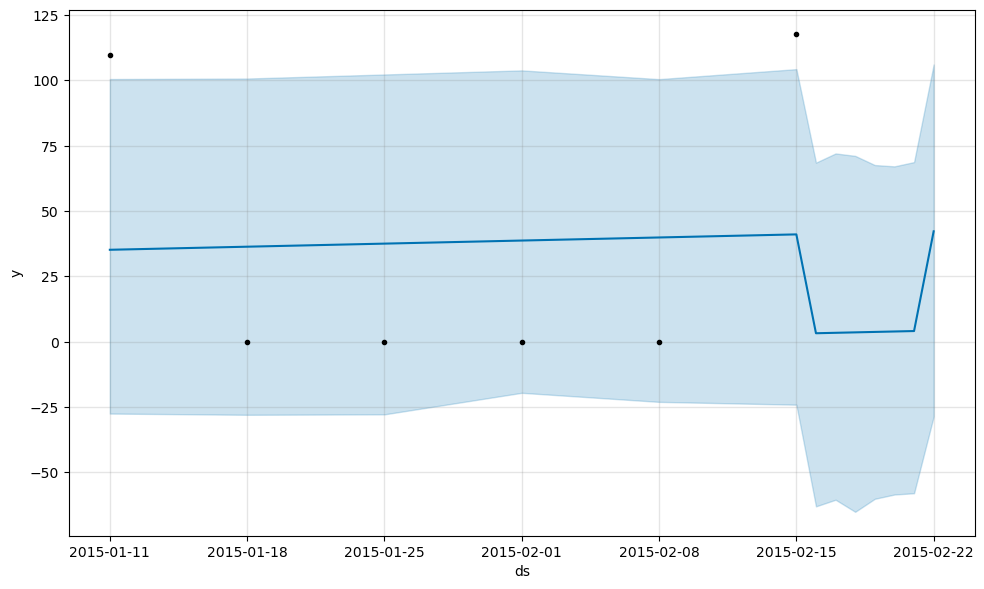

In [13]:
# Préparer les données pour Prophet
df_for_prophet = weekly_revenue.rename(columns={'Order Date': 'ds', 'Revenue': 'y'}).dropna()

# Initialiser et entraîner le modèle Prophet
model = Prophet(weekly_seasonality=True, daily_seasonality=False)
model.fit(df_for_prophet)

# Faire des prédictions pour les 7 prochains jours
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Visualiser les prévisions
model.plot(forecast)
plt.show()

In [ ]:
# Comparer les prévisions avec les données réelles (si disponibles)
from sklearn.metrics import mean_squared_error

# Calculer le RMSE
y_true = df['y'].values[-7:]  # Les dernières 7 valeurs de l'ensemble d'entraînement
y_pred = forecast['yhat'].values[-7:]  # Les dernières 7 valeurs prédites

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"RMSE: {rmse}")